   movie id  rate  gender  occupation  Other  Action  Adventure  Animation  \
0       242     3       1          20      0       0          0          0   
1       302     3       0           6      0       0          0          0   
2       377     1       1          20      0       0          0          0   
3        51     2       1          19      0       0          0          0   
4       346     1       1           3      0       0          0          0   

   Children's  Comedy  ...  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0           0       1  ...        0          0       0        0        0   
1           0       0  ...        0          1       0        0        1   
2           1       1  ...        0          0       0        0        0   
3           0       0  ...        0          0       0        0        0   
4           0       0  ...        0          0       0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  
0        0       0         0 

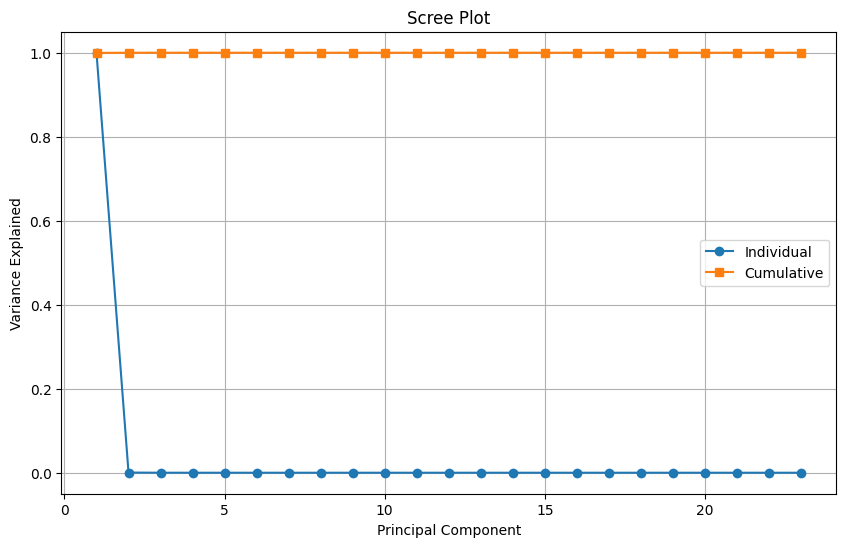

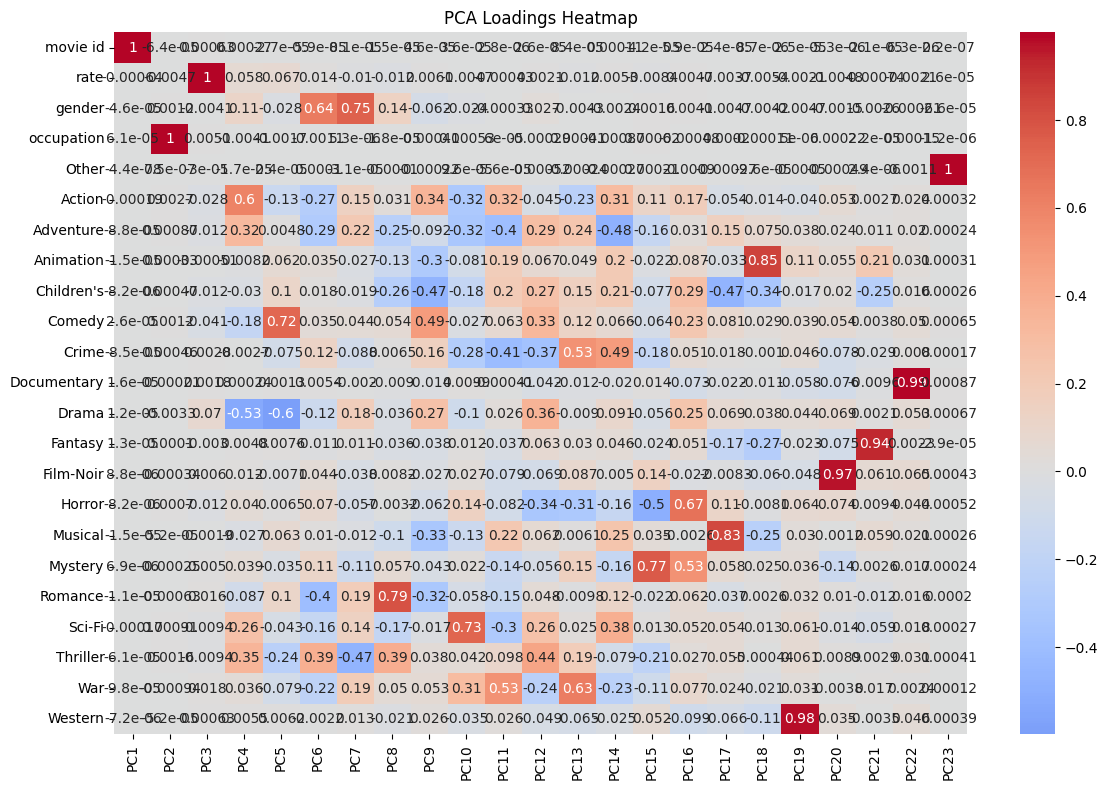

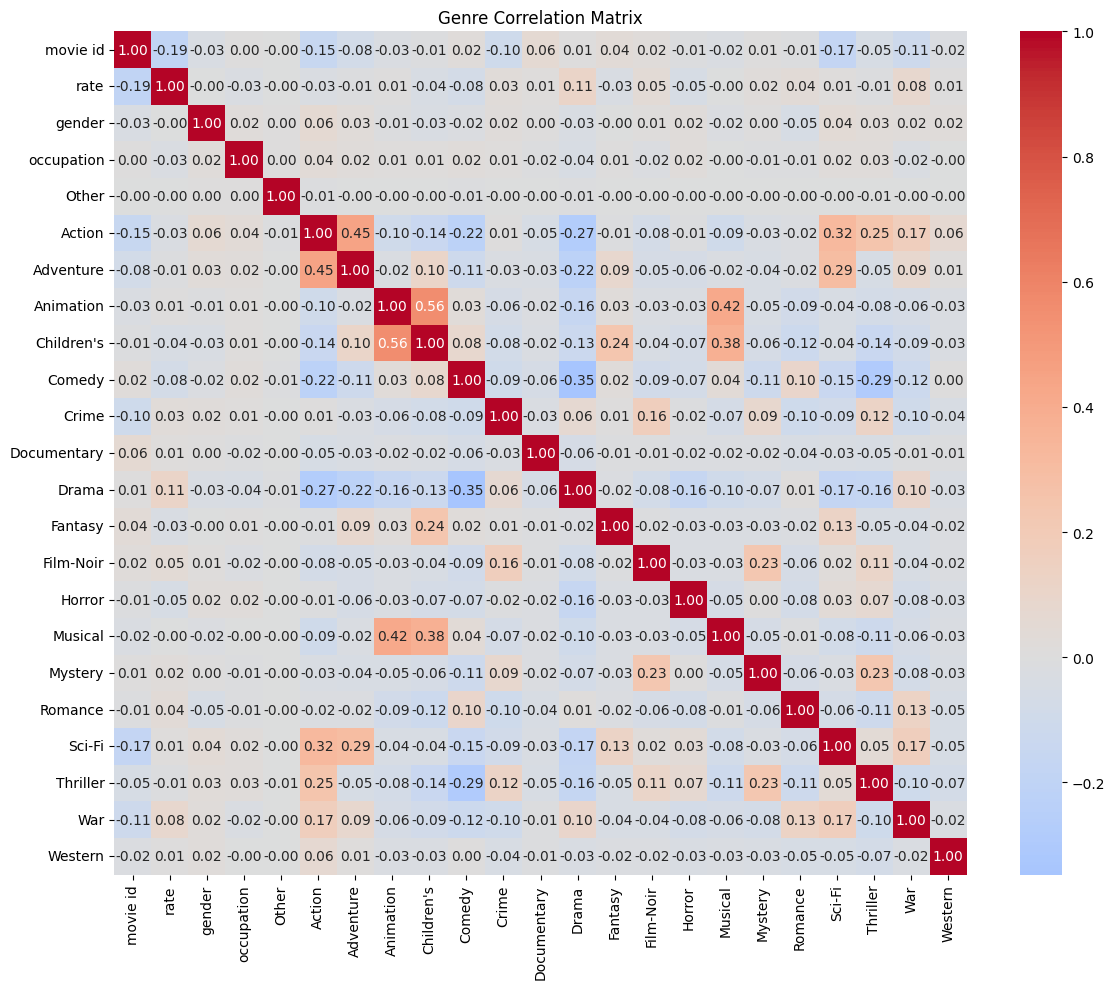


Top features for PC1:
movie id    1.000000
rate        0.000644
Action      0.000195
Sci-Fi      0.000171
War         0.000098
Name: PC1, dtype: float64

Top features for PC2:
occupation    0.999975
rate          0.004663
Drama         0.003257
Action        0.002742
Thriller      0.001607
Name: PC2, dtype: float64

Top features for PC3:
rate      0.995644
Drama     0.069986
Comedy    0.040904
Action    0.027884
War       0.018336
Name: PC3, dtype: float64


In [14]:
# pca_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

PATH_TO_CSV = "../data/raw/raw_cleaned/final_test.csv"

def main():
    # Load data
    df = pd.read_csv(PATH_TO_CSV)
    
    # Prepare genre features
    # genre_columns = df.columns[:-1]
    # X = df[genre_columns]
    cols = ['movie id', 'rate', 'gender', 'occupation', 'Other', 'Action', 'Adventure', 'Animation',
        "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
        'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
        'Thriller', 'War', 'Western']

    # Create a DataFrame with only those columns
    X = df[cols]

    # Now df contains only your desired columns and you can use it further
    print(X.head())
    
    # # Standardize
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)
    
    # PCA
    pca = PCA()
    X_pca = pca.fit_transform(X)
    
    # Visualization
    plot_scree(pca)
    plot_loadings(pca, cols)
    plot_correlation(X)
    
    # Interpretation
    interpret_pca(pca, cols)

def plot_scree(pca):
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Individual')
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 's-', label='Cumulative')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.title('Scree Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loadings(pca, feature_names):
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
        index=feature_names
    )
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
    plt.title('PCA Loadings Heatmap')
    plt.tight_layout()
    plt.show()

def plot_correlation(X):
    corr_matrix = X.corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title('Genre Correlation Matrix')
    plt.tight_layout()
    plt.show()

def interpret_pca(pca, feature_names):
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
        index=feature_names
    )
    
    for i in range(3):  # First 3 PCs
        pc_loadings = abs(loadings[f'PC{i+1}']).sort_values(ascending=False)
        print(f"\nTop features for PC{i+1}:")
        print(pc_loadings.head())

if __name__ == "__main__":
    main()